Задание:
* Построить базу знаний в любой предметной области, сформировав массив документов (например, публикаций или файлов на каком-либо портале или набор файлов на компьютере или сервере и т.п.) и построить граф знаний об этих документах
* Реализовать сервис краткого описания каждого документа в базе знаний (абстракт, автореферат - summary)
* Реализовать сервис поиска по запросу внутри базы знаний


# Парсинг статей на тему психологии

In [ ]:
import bs4
import requests
from tqdm.notebook import tqdm

base_path = "https://www.paracels.ru"
r = requests.get("https://www.paracels.ru/populjarnaja-psihologija/")
soup = bs4.BeautifulSoup(r.text)

titles_links = soup.find(id="article-list__wrapper").find_all('a')
titles = [i.text for i in titles_links]

def load_page(url):
    return bs4.BeautifulSoup(requests.get(base_path + url).text)

def get_body(s):
    return s.find(class_="editor-area").text

pages_links = [link.get('href') for link in tqdm(titles_links)]
pages = [get_body(load_page(url)) for url in tqdm(pages_links)]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

df = pd.DataFrame(dict(titles=titles, text=pages))

In [ ]:
df

,titles,text
0,Мифы о психологии и психологах,\nВсего каких-то десять лет назад профессия пс...
1,Детский практический психолог – начало пути,\nПрактическая психологическая работа с детьми...
2,Стервы… за что их любят?,\nВ современном словоупотреблении под стервой ...
3,Эти сложные дети...,"\nНам часто задают вопрос: ""Я стараюсь принима..."
4,Как устроен психологический тренинг и что он д...,\nЭто широко распространенная во всем мире фор...
...,...,...
112,Краткосрочная поведенческая психотерапия: взгл...,\nКраткосрочная поведенческая психотерапия (КП...
113,Парадокс и парадоксальные методы краткосрочной...,\nКак вы хотите работать с клиентами в терапии...
114,Эффективная и доступная краткосрочная психоло...,"\nКарл Поппер: «Жизнь – это проблема, которую ..."
115,Поведенческие принципы в КПТ,\nПсихологическая энциклопедия [2] предлагает ...


In [ ]:
df.to_csv('articles_on_psychology.csv', index=False)

In [5]:
import pandas as pd
df = pd.read_csv('articles_on_psychology.csv')

In [6]:
df

,titles,text
0,Мифы о психологии и психологах,\nВсего каких-то десять лет назад профессия пс...
1,Детский практический психолог – начало пути,\nПрактическая психологическая работа с детьми...
2,Стервы… за что их любят?,\nВ современном словоупотреблении под стервой ...
3,Эти сложные дети...,"\nНам часто задают вопрос: ""Я стараюсь принима..."
4,Как устроен психологический тренинг и что он д...,\nЭто широко распространенная во всем мире фор...
...,...,...
112,Краткосрочная поведенческая психотерапия: взгл...,\nКраткосрочная поведенческая психотерапия (КП...
113,Парадокс и парадоксальные методы краткосрочной...,\nКак вы хотите работать с клиентами в терапии...
114,Эффективная и доступная краткосрочная психоло...,"\nКарл Поппер: «Жизнь – это проблема, которую ..."
115,Поведенческие принципы в КПТ,\nПсихологическая энциклопедия [2] предлагает ...


# Обработка текста

In [8]:
import json

with open('/content/stop_words_russian.json', 'r', encoding='utf-8') as f:
    stop_words_data = json.load(f)

stop_words = set(stop_words_data)

In [9]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.replace('\n', ' ').strip()
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    cleaned_text = ' '.join(lemmatizer.lemmatize(word) for word in words if word not in stop_words)
    return cleaned_text


df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
df

,titles,text,clean_text
0,Мифы о психологии и психологах,\nВсего каких-то десять лет назад профессия пс...,какихто профессия психолога стране считалась с...
1,Детский практический психолог – начало пути,\nПрактическая психологическая работа с детьми...,практическая психологическая работа детьми тво...
2,Стервы… за что их любят?,\nВ современном словоупотреблении под стервой ...,современном словоупотреблении стервой подразум...
3,Эти сложные дети...,"\nНам часто задают вопрос: ""Я стараюсь принима...",задают вопрос стараюсь принимать ребенка таким...
4,Как устроен психологический тренинг и что он д...,\nЭто широко распространенная во всем мире фор...,широко распространенная мире форма групповой п...
...,...,...,...
112,Краткосрочная поведенческая психотерапия: взгл...,\nКраткосрочная поведенческая психотерапия (КП...,краткосрочная поведенческая психотерапия кпп у...
113,Парадокс и парадоксальные методы краткосрочной...,\nКак вы хотите работать с клиентами в терапии...,хотите работать клиентами терапии долгую измен...
114,Эффективная и доступная краткосрочная психоло...,"\nКарл Поппер: «Жизнь – это проблема, которую ...",карл поппер проблема которую решать современно...
115,Поведенческие принципы в КПТ,\nПсихологическая энциклопедия [2] предлагает ...,психологическая энциклопедия предлагает следую...


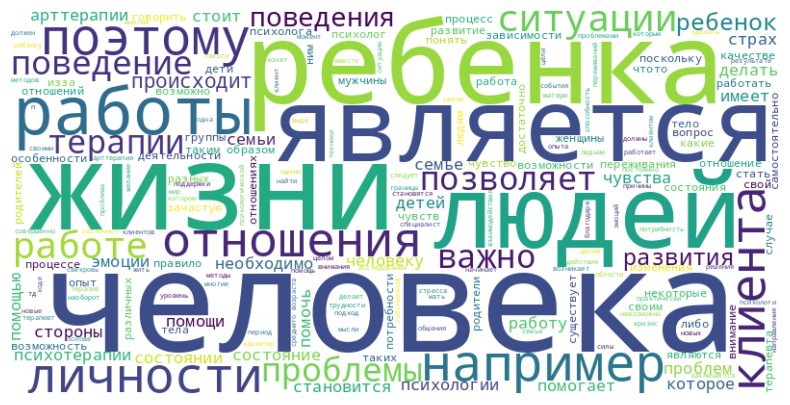

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Суммаризация

In [12]:
from transformers import MBartTokenizer, MBartForConditionalGeneration

model_name = "IlyaGusev/mbart_ru_sum_gazeta"
tokenizer = MBartTokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.47G [00:00<?, ?B/s]

In [13]:
def summarize_text(text):
    input_ids = tokenizer(
        [text],
        max_length=1024,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )["input_ids"]

    output_ids = model.generate(
        input_ids=input_ids,
        num_beams=4,
        no_repeat_ngram_size=3,
        min_length=30,
        max_length=150,
        early_stopping=True,
    )[0]

    summary = tokenizer.decode(output_ids, skip_special_tokens=True)
    return summary

df['summarized_text'] = df['clean_text'].apply(summarize_text)

In [16]:
df

,titles,text,clean_text,summarized_text
0,Мифы о психологии и психологах,\nВсего каких-то десять лет назад профессия пс...,какихто профессия психолога стране считалась с...,В современном мире психология стала одной из с...
1,Детский практический психолог – начало пути,\nПрактическая психологическая работа с детьми...,практическая психологическая работа детьми тво...,В начале становления психолога можно столкнуть...
2,Стервы… за что их любят?,\nВ современном словоупотреблении под стервой ...,современном словоупотреблении стервой подразум...,В современном мире стервы — это не только косм...
3,Эти сложные дети...,"\nНам часто задают вопрос: ""Я стараюсь принима...",задают вопрос стараюсь принимать ребенка таким...,"Взрослые должны знать, как правильно выражать ..."
4,Как устроен психологический тренинг и что он д...,\nЭто широко распространенная во всем мире фор...,широко распространенная мире форма групповой п...,Психологические тренинги — один из самых попул...
...,...,...,...,...
112,Краткосрочная поведенческая психотерапия: взгл...,\nКраткосрочная поведенческая психотерапия (КП...,краткосрочная поведенческая психотерапия кпп у...,В современном быстром темпе жизни все больше л...
113,Парадокс и парадоксальные методы краткосрочной...,\nКак вы хотите работать с клиентами в терапии...,хотите работать клиентами терапии долгую измен...,В преддверии нового учебного года я расскажу о...
114,Эффективная и доступная краткосрочная психоло...,"\nКарл Поппер: «Жизнь – это проблема, которую ...",карл поппер проблема которую решать современно...,В современном обществе психология стала неотъе...
115,Поведенческие принципы в КПТ,\nПсихологическая энциклопедия [2] предлагает ...,психологическая энциклопедия предлагает следую...,В психотерапии есть несколько определений когн...


In [15]:
df.to_csv('articles_on_psychology_sum.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('/content/articles_on_psychology_sum.csv')

# Граф базы знаний

In [2]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


In [3]:
import networkx as nx
from pyvis.network import Network
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
import numpy as np

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['clean_text'])
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

threshold = 0.1
net = Network(notebook=True)

def split_text(text, words_per_line=5):
    words = text.split()
    lines = [' '.join(words[i:i+words_per_line]) for i in range(0, len(words), words_per_line)]
    return "\n".join(lines)


for i, row in df.iterrows():
    summarized_text = split_text(row['summarized_text'], words_per_line=5)
    net.add_node(i, label=row['titles'], title=summarized_text)

for i in range(len(df)):
    for j in range(i+1, len(df)):
        if similarity_matrix[i][j] > threshold:
            net.add_edge(i, j)

net.show_buttons(filter_=['physics'])
net.save_graph("articles_graph.html")

# Поиск по базе знаний

In [19]:
def search_and_print_articles(df):
    def search_articles(query, top_n=5):
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(df['text'])
        query_vector = vectorizer.transform([query])
        similarities = cosine_similarity(query_vector, tfidf_matrix)
        top_indices = similarities.argsort()[0][-top_n:][::-1]
        similar_article_titles = df['titles'].iloc[top_indices].tolist()
        return similar_article_titles

    query = input("Введите запрос: ")
    similar_article_titles = search_articles(query)
    print()
    print("Подходящие статьи:")
    for title in similar_article_titles:
        print(title)

In [69]:
search_and_print_articles(df)

Введите запрос: депрессия

Подходящие статьи:
Стратегии работы с депрессией в гештальт-терапии
Что такое созависимость
Кризис среднего возраста у мужчин: в чём проявляется, в какие именно годы
Семейный кризис – случайность или закономерность?
Десенсибилизация и переработка движениями глаз (ДПДГ) Терапия


In [82]:
search_and_print_articles(df)

Введите запрос: психиатр и психолог разница

Подходящие статьи:
Кто есть кто среди специалистов
Как стать психологом
Психолог – самая престижная профессия ХХI века
Для чего нужна психотерапия личности?
Детский практический психолог – начало пути


In [70]:
search_and_print_articles(df)

Введите запрос: кризис среднего возраста

Подходящие статьи:
Кризис среднего возраста у женщин
Кризис среднего возраста – проблема или решение?
Кризис среднего возраста у мужчин: в чём проявляется, в какие именно годы
Семейный кризис - как пережить и сохранить отношения
Семейный кризис – случайность или закономерность?


In [71]:
search_and_print_articles(df)

Введите запрос: когнитивно-поведенческая терапия

Подходящие статьи:
Когнитивно-поведенческая психотерапия: открытие двери к изменению
Поведенческие принципы в КПТ
Краткосрочная поведенческая психотерапия: взгляд на эффективный метод лечения
Рационально-эмоционально поведенческая терапия
Методы и техники краткосрочной терапии


In [74]:
search_and_print_articles(df)

Введите запрос: дети и родители

Подходящие статьи:
Приемный ребенок в семье
Трудности воспитания
Арт-терапевтические средства в реализации психологической поддержки семей с особым ребенком
Мама, побудь со мной
Семья – это маленькое государство


In [78]:
search_and_print_articles(df)

Введите запрос: расстройства личности

Подходящие статьи:
Как распознать сотрудника с тяжелым расстройством личности: асоциальное поведение, социопатия, шизофрения
Расстройство пищевого поведения
Патопсихология
Созависимость – не приговор!
Для чего нужна психотерапия личности?


In [79]:
search_and_print_articles(df)

Введите запрос: нарциссизм

Подходящие статьи:
Мужчина нарцисс: признаки мужчины-нарцисса и советы психолога
Нарциссы среди нас. Психология нарциссизма
Когнитивно-поведенческая психотерапия: открытие двери к изменению
Кризис среднего возраста у женщин
Как научиться говорить НЕТ и перестать всем угождать


In [21]:
search_and_print_articles(df)

Введите запрос: как воспитывать ребенка

Подходящие статьи:
Как подготовить ребенка к жизни в обществе
Приемный ребенок в семье
Детский практический психолог – начало пути
Трудности воспитания
Что рисуют дети, и когда нужен детский психолог
